In [44]:
import json
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


In [45]:
# Load data from JSON file
with open('data.json', 'r') as file:
    data = json.load(file)

    # Extracting data for plottin
    years = list(data.keys())
    months = list(data[years[0]].keys())
    print(months)
    cpi_data = [29.0,28.9,28.9,29.0,29.0,29.1,29.2,29.2,29.3,29.4,29.4,29.4]
    unem_data = []
    fed_data = []
    adj_unem_data = []
    for year in years:
        for month in months:
            #Check if data[year] has month as a key
            if not month in data[year]:
                break
            cpi_data.append(float(data[year][month]['CPI']))
            unem_data.append(float(data[year][month]['Unemployment']))
            adj_unem_data.append(float(data[year][month]['Unemployment'])-4)
            fed_data.append(float(data[year][month]['FedFunds']))
    years = [int(year) for year in years]


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def getIndexFromYearMonth(year, month):
    #year = int(year)
    month = months.index(month)
    return (year-1960)*12 + month

print(cpi_data[getIndexFromYearMonth(2024, 'Jan')+12])


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
308.417


[5.2, 4.8, 5.4, 5.2, 5.1, 5.4, 5.5, 5.6, 5.5, 6.1, 6.1, 6.6, 6.6, 6.9, 6.9, 7.0, 7.1, 6.9, 7.0, 6.6, 6.7, 6.5, 6.1, 6.0, 5.8, 5.5, 5.6, 5.6, 5.5, 5.5, 5.4, 5.7, 5.6, 5.4, 5.7, 5.5, 5.7, 5.9, 5.7, 5.7, 5.9, 5.6, 5.6, 5.4, 5.5, 5.5, 5.7, 5.5, 5.6, 5.4, 5.4, 5.3, 5.1, 5.2, 4.9, 5.0, 5.1, 5.1, 4.8, 5.0, 4.9, 5.1, 4.7, 4.8, 4.6, 4.6, 4.4, 4.4, 4.3, 4.2, 4.1, 4.0, 4.0, 3.8, 3.8, 3.8, 3.9, 3.8, 3.8, 3.8, 3.7, 3.7, 3.6, 3.8, 3.9, 3.8, 3.8, 3.8, 3.8, 3.9, 3.8, 3.8, 3.8, 4.0, 3.9, 3.8, 3.7, 3.8, 3.7, 3.5, 3.5, 3.7, 3.7, 3.5, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.7, 3.7, 3.5, 3.5, 3.9, 4.2, 4.4, 4.6, 4.8, 4.9, 5.0, 5.1, 5.4, 5.5, 5.9, 6.1, 5.9, 5.9, 6.0, 5.9, 5.9, 5.9, 6.0, 6.1, 6.0, 5.8, 6.0, 6.0, 5.8, 5.7, 5.8, 5.7, 5.7, 5.7, 5.6, 5.6, 5.5, 5.6, 5.3, 5.2, 4.9, 5.0, 4.9, 5.0, 4.9, 4.9, 4.8, 4.8, 4.8, 4.6, 4.8, 4.9, 5.1, 5.2, 5.1, 5.1, 5.1, 5.4, 5.5, 5.5, 5.9, 6.0, 6.6, 7.2, 8.1, 8.1, 8.6, 8.8, 9.0, 8.8, 8.6, 8.4, 8.4, 8.4, 8.3, 8.2, 7.9, 7.7, 7.6, 7.7, 7.4, 7.6, 7.8, 7.8,

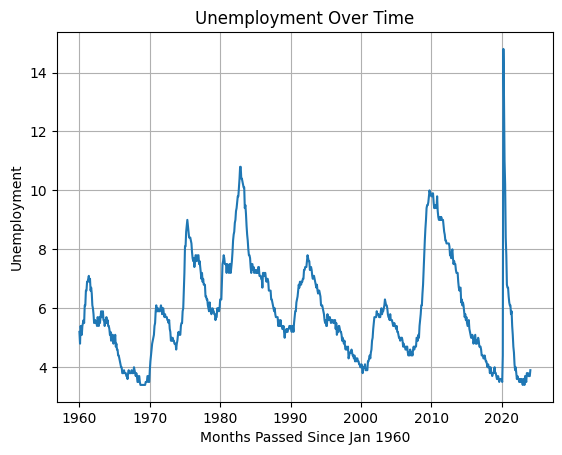

In [46]:
print(unem_data)
year_start = 1960
month_start = 'Jan'
#months_passed = range(getIndexFromYearMonth(year_start, month_start), len(cpi_data))
months_passed = range(0, len(fed_data))
years_passed = [1960+(i/12) for i in months_passed]
print(months_passed)

# Plotting CPI data
plt.plot(years_passed, unem_data, linewidth=1.5)  # marker='o' adds circular markers at data points
plt.title('Unemployment Over Time')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('Unemployment')
plt.grid(True)
plt.show()

770
770


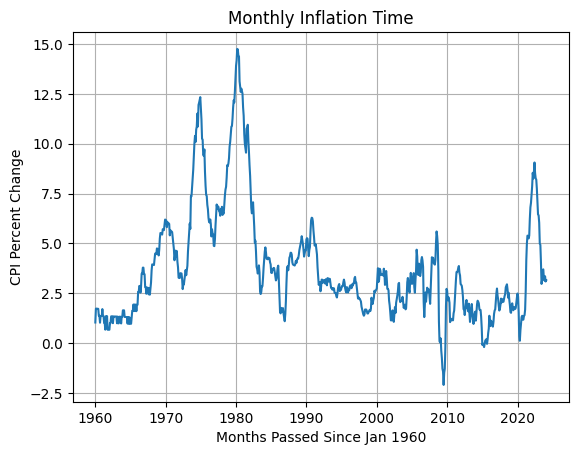

In [47]:

def inflation_12_month(month):
    #return 100*math.log(cpi_data[month]/cpi_data[month-12])
    return 100*(cpi_data[month]-cpi_data[month-12])/cpi_data[month-12]
ADJ_CPI_monthly = []
CPI_monthly = []
CPI_monthly.extend([inflation_12_month(month) for month in range(12, len(months_passed)+12)])
ADJ_CPI_monthly.extend([inflation_12_month(month)-2 for month in range(12, len(months_passed)+12)])
print(len(CPI_monthly))
print(len(ADJ_CPI_monthly))
plt.plot(years_passed, CPI_monthly, linewidth=1.5) 

plt.title('Monthly Inflation Time')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('CPI Percent Change')
plt.grid(True)
plt.show()


Data Sample: 770
Mean Squared Error (MSE): 23.605577348204516


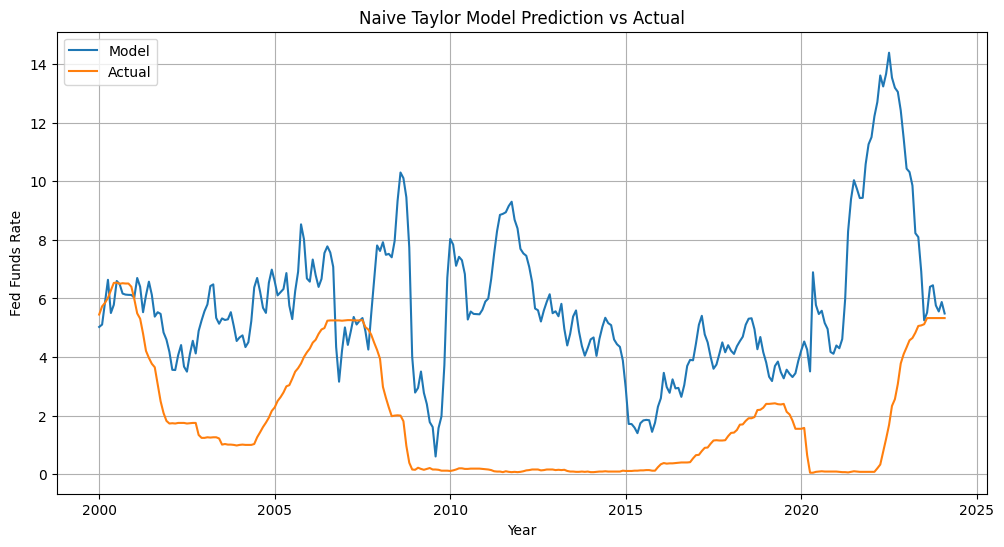

Data Sample: 770
Mean Squared Error (MSE): 6.492970064507139


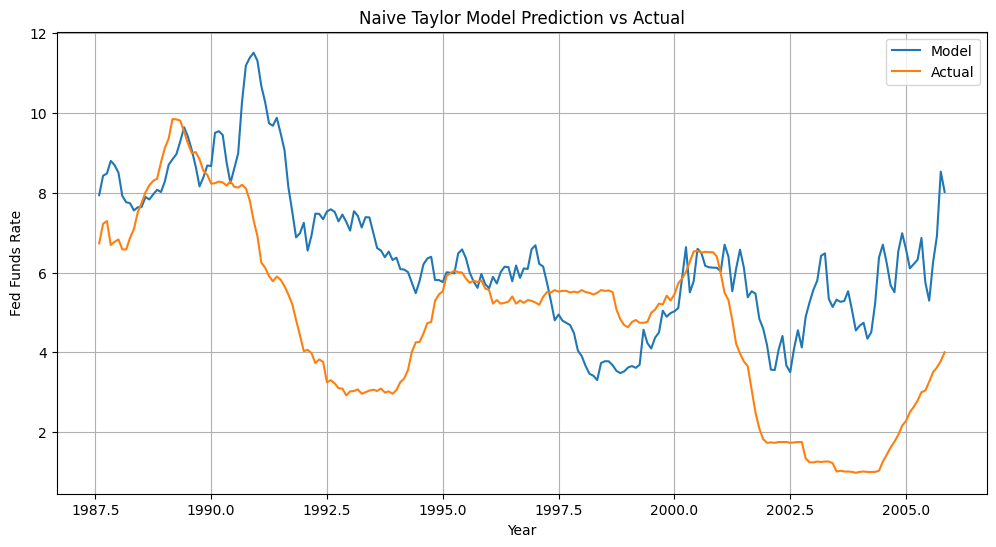

In [48]:
#Applying Taylor Model

# rt = 1 + 1.5p_t-1 + .5(u_t–1 – 4)
#1959 Dec Unem: 5.3

#GREENSPAN
# START_YEAR = 1987 #Do not set below Feb 1961
# START_MONTH = 'Aug'

# END_YEAR = 2005 #Do not set above Feb 2024
# END_MONTH = 'Nov'

START_YEAR = 2000
START_MONTH = 'Jan'

END_YEAR = 2024
END_MONTH = 'Feb'

def getNaiveTaylorModel(year_i, month_i, year_f, month_f, plot):
    START_INDEX = getIndexFromYearMonth(year_i, month_i)
    END_INDEX = getIndexFromYearMonth(year_f, month_f)

    taylor_model = [0]
    for i in range(1, len(months_passed)):
        taylor_model.append(1 + 1.5*CPI_monthly[i-1] + 0.5*(unem_data[i-1] - 4))
    print("Data Sample:", len(years_passed))
    # print(START_INDEX, END_INDEX)
    # print(fed_data[770-1], taylor_model[770-1])

    mse = mean_squared_error(fed_data[START_INDEX:END_INDEX+1], taylor_model[START_INDEX:END_INDEX+1])
    print("Mean Squared Error (MSE):", mse)

    if(plot):
        plt.figure(figsize=(12, 6))
        plt.plot(years_passed[START_INDEX:END_INDEX+1], taylor_model[START_INDEX:END_INDEX+1], linewidth=1.5, label='Model')
        plt.plot(years_passed[START_INDEX:END_INDEX+1], fed_data[START_INDEX:END_INDEX+1], linewidth=1.5, label='Actual') 
        plt.title('Naive Taylor Model Prediction vs Actual')
        plt.xlabel(f'Year')
        plt.ylabel('Fed Funds Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

getNaiveTaylorModel(START_YEAR, START_MONTH, END_YEAR, END_MONTH, True)

getNaiveTaylorModel(1987, 'Aug', 2005, 'Nov', True)


290 203 87
[ 0.15834903 -0.52680075] 2.3926690938158903
Mean Squared Error (MSE): 2.0154862840228924


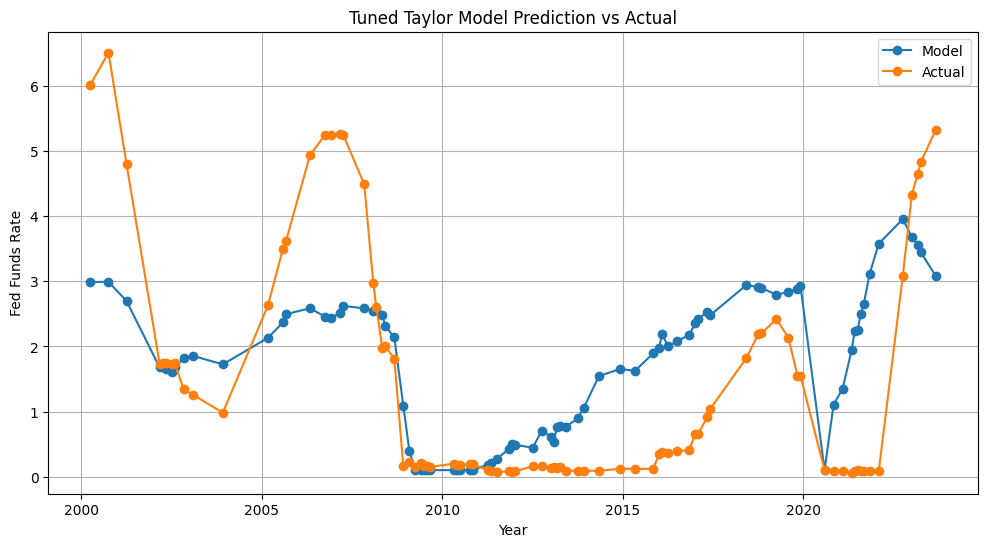

220 154 66
[ 1.50007923 -1.00836418] 1.6689285788130777
Mean Squared Error (MSE): 2.0121477508967427


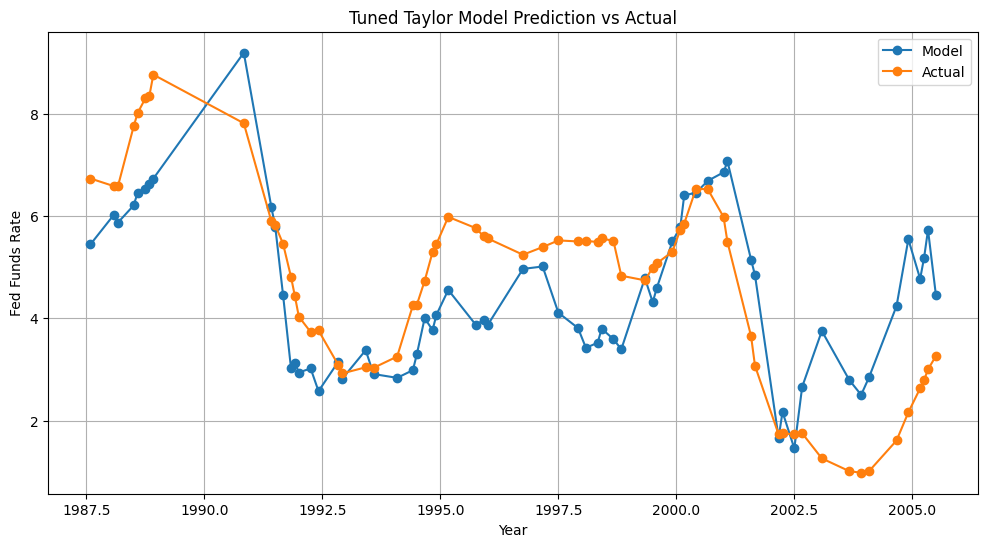

In [49]:
START_YEAR = 2000
START_MONTH = 'Jan'

END_YEAR = 2024
END_MONTH = 'Feb'

def getTunedTaylorModel(year_i, month_i, year_f, month_f, plot):
    START_INDEX = getIndexFromYearMonth(year_i, month_i)
    END_INDEX = getIndexFromYearMonth(year_f, month_f)


    CPI_Sample = np.array(CPI_monthly[START_INDEX-1:END_INDEX])
    Unem_Sample = np.array(adj_unem_data[START_INDEX-1:END_INDEX])
    Fed_Sample = np.array(fed_data[START_INDEX:END_INDEX+1])
    Years_Sample = np.array(years_passed[START_INDEX:END_INDEX+1])

    #print(Fed_Sample)
    total_samples = END_INDEX - START_INDEX + 1
    indices = np.random.permutation(total_samples)

    train_samples = int(total_samples * 0.7)
    val_samples = total_samples - train_samples


    x1_train, x2_train, Y_train = CPI_Sample[indices[:train_samples]], Unem_Sample[indices[:train_samples]], Fed_Sample[indices[:train_samples]]
    #year_train = Years_Sample[indices[:train_samples]]

    x1_val, x2_val, Y_Val = CPI_Sample[indices[train_samples:train_samples+val_samples]], \
                            Unem_Sample[indices[train_samples:train_samples+val_samples]], \
                            Fed_Sample[indices[train_samples:train_samples+val_samples]]
    year_val = Years_Sample[indices[train_samples:train_samples+val_samples]]

    # print(x2_train)
    # print(x2_val)
    print(total_samples, len(x1_train), len(x1_val))

    X_train = np.column_stack((np.ones_like(x1_train), x1_train, x2_train))
    X_Val = np.column_stack((np.ones_like(x1_val), x1_val, x2_val))
    #print(X_train)
    model = LinearRegression()
    model.fit(X_train, Y_train)

    print(model.coef_[1:], model.intercept_)
    Y_Pred = np.maximum(model.predict(X_Val), 0.1)
    mse = mean_squared_error(Y_Val, Y_Pred)
    print("Mean Squared Error (MSE):", mse)

    sorted_indices = np.argsort(year_val)

    if(plot):
        plt.figure(figsize=(12, 6))
        plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices], linewidth=1.5, label='Model', marker='o')
        plt.plot(year_val[sorted_indices], Y_Val[sorted_indices], linewidth=1.5, label='Actual', marker='o') 


        plt.title('Tuned Taylor Model Prediction vs Actual')
        plt.xlabel(f'Year')
        plt.ylabel('Fed Funds Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

getTunedTaylorModel(START_YEAR, START_MONTH, END_YEAR, END_MONTH, True)

getTunedTaylorModel(1987, 'Aug', 2005, 'Nov', True)


Total Sample: 282, Train Sample: 225, Validation Sample: 57
Coefficients: [-4.4408921e-16  0.0000000e+00  1.0000000e+00], Intercept: 8.881784197001252e-16
Mean Squared Error (MSE): 4.385964912280704e-05


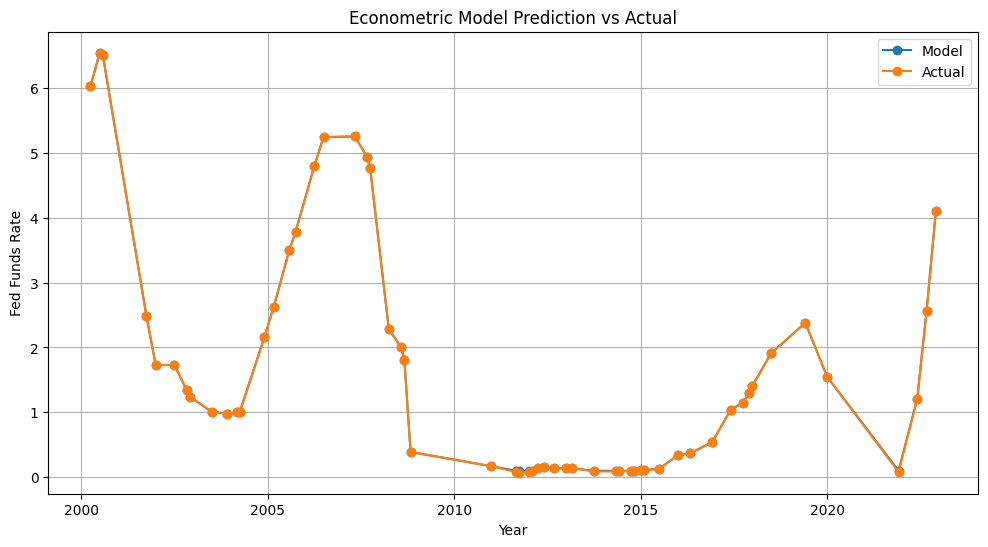

In [61]:
START_YEAR = 2000
START_MONTH = 'Jan'

END_YEAR = 2023
END_MONTH = 'Jun'

def getEconometricModel(year_i, month_i, year_f, month_f, plot):

    START_INDEX = getIndexFromYearMonth(year_i, month_i)
    END_INDEX = getIndexFromYearMonth(year_f, month_f)

    CPI_Sample = np.array(ADJ_CPI_monthly[START_INDEX-1:END_INDEX])
    Unem_Sample = np.array(adj_unem_data[START_INDEX-1:END_INDEX])
    Fed_Sample = np.array(fed_data[START_INDEX-1:END_INDEX])
    Years_Sample = np.array(years_passed[START_INDEX:END_INDEX+1])
    Output_Sample = np.array(fed_data[START_INDEX:END_INDEX+1])

    total_samples = END_INDEX - START_INDEX + 1
    indices = np.random.permutation(total_samples)

    train_samples = int(total_samples * 0.8)
    val_samples = total_samples - train_samples

    x1_train, x2_train, x3_train, Y_train = CPI_Sample[indices[:train_samples]], \
                                    Unem_Sample[indices[:train_samples]], \
                                    Fed_Sample[indices[:train_samples]], \
                                    Output_Sample[indices[:train_samples]]
    #year_train = Years_Sample[indices[:train_samples]]

    x1_val, x2_val, x3_val, Y_Val = CPI_Sample[indices[train_samples:train_samples+val_samples]], \
                            Unem_Sample[indices[train_samples:train_samples+val_samples]], \
                            Fed_Sample[indices[train_samples:train_samples+val_samples]],\
                            Output_Sample[indices[train_samples:train_samples+val_samples]]
    year_val = Years_Sample[indices[train_samples:train_samples+val_samples]]

    print(f"Total Sample: {total_samples}, Train Sample: {len(x1_train)}, Validation Sample: {len(x1_val)}")


    X_train = np.column_stack((np.ones_like(x1_train), x1_train, x2_train, x3_train))
    X_Val = np.column_stack((np.ones_like(x1_val), x1_val, x2_val, x3_val))
    #print(X_train)
    model = LinearRegression()
    model.fit(X_train, Y_train)

    print(f"Coefficients: {model.coef_[1:]}, Intercept: {model.intercept_}")
    Y_Pred = np.maximum(model.predict(X_Val), 0.1)
    mse = mean_squared_error(Y_Val, Y_Pred)
    print("Mean Squared Error (MSE):", mse)

    sorted_indices = np.argsort(year_val)

    if(plot):
        plt.figure(figsize=(12, 6))
        plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices], linewidth=1.5, label='Model', marker='o')
        plt.plot(year_val[sorted_indices], Y_Val[sorted_indices], linewidth=1.5, label='Actual', marker='o') 


        plt.title('Econometric Model Prediction vs Actual')
        plt.xlabel(f'Year')
        plt.ylabel('Fed Funds Rate')
        plt.legend()
        plt.grid(True)
        plt.show()
        return model

model = getEconometricModel(START_YEAR, START_MONTH, END_YEAR, END_MONTH, True)


In [60]:
TEST_START_YEAR = 2023
TEST_START_MONTH = 'Jan'

TEST_END_YEAR = 2024
TEST_END_MONTH = 'Feb'

TEST_START_INDEX = getIndexFromYearMonth(TEST_START_YEAR, TEST_START_MONTH)
TEST_END_INDEX = getIndexFromYearMonth(TEST_END_YEAR, TEST_END_MONTH)

TEST_CPI_Sample = np.array(ADJ_CPI_monthly[TEST_START_INDEX-1:TEST_END_INDEX])
TEST_Unem_Sample = np.array(adj_unem_data[TEST_START_INDEX-1:TEST_END_INDEX])
TEST_Fed_Sample = np.array(fed_data[TEST_START_INDEX-1:TEST_END_INDEX])
TEST_Years_Sample = np.array(years_passed[TEST_START_INDEX:TEST_END_INDEX+1])
TEST_Output_Sample = np.array(fed_data[TEST_START_INDEX:TEST_END_INDEX+1])

X_TEST = np.column_stack((np.ones_like(TEST_CPI_Sample), TEST_CPI_Sample, TEST_Unem_Sample, TEST_Fed_Sample))
Y_PRED_TEST = np.maximum(model.predict(X_TEST), 0.1)
mse = mean_squared_error(TEST_Output_Sample, Y_PRED_TEST)

print("Mean Squared Error (MSE):", mse)
plt.plot(TEST_Years_Sample, Y_PRED_TEST, linewidth=1.5, label='Model')
plt.plot(TEST_Years_Sample, TEST_Output_Sample, linewidth=1.5, label='Actual')

plt.title('Econometric Model Backtest vs Actual')
plt.xlabel(f'Year')
plt.ylabel('Fed Funds Rate')
plt.legend()
plt.grid(True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'predict'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


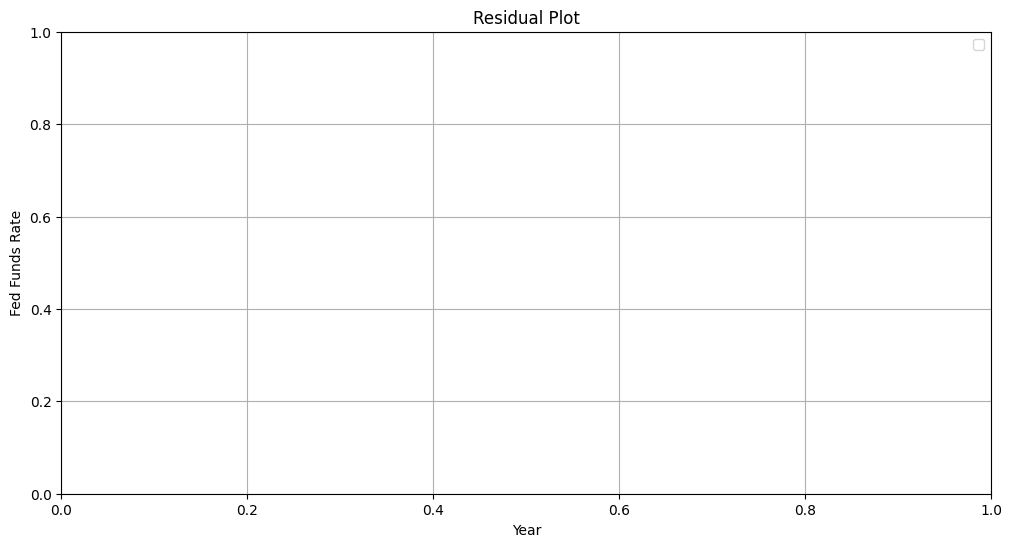

In [52]:
START_YEAR = 2000
START_MONTH = 'Jan'

END_YEAR = 2024
END_MONTH = 'Feb'

START_INDEX = getIndexFromYearMonth(START_YEAR, START_MONTH)
END_INDEX = getIndexFromYearMonth(END_YEAR, END_MONTH)

plt.figure(figsize=(12, 6))
# plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices]-Y_Val[sorted_indices], linewidth=1.5, label='Model', marker='o')


plt.title('Residual Plot')
plt.xlabel(f'Year')
plt.ylabel('Fed Funds Rate')
plt.legend()
plt.grid(True)
plt.show()

Total Sample: 290, Train Sample: 232, Validation Sample: 58
Mean Squared Error (MSE): 0.024906214139513994


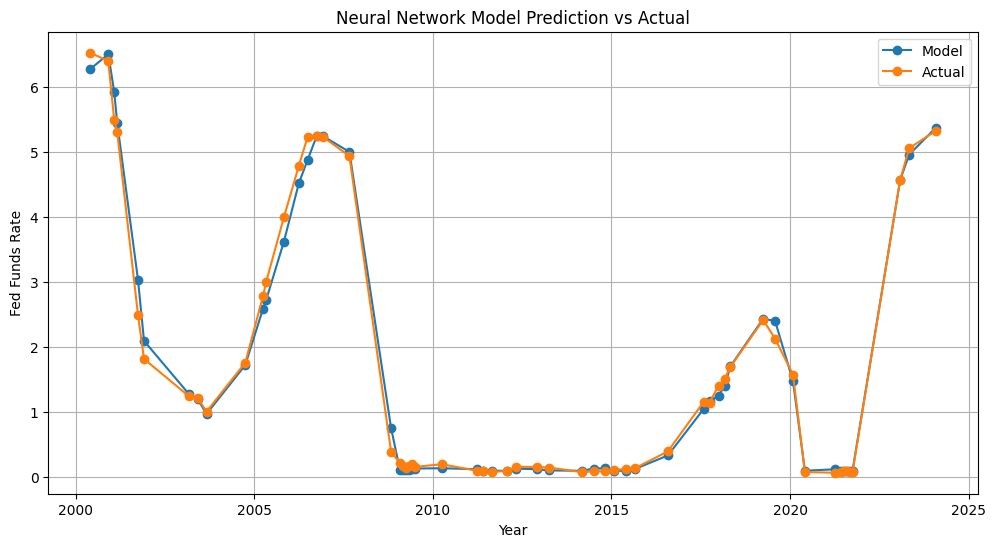

In [53]:
START_YEAR = 2000
START_MONTH = 'Jan'

END_YEAR = 2024
END_MONTH = 'Feb'

def getNeuralNetworkModel(year_i, month_i, year_f, month_f, plot):

    START_INDEX = getIndexFromYearMonth(year_i, month_i)
    END_INDEX = getIndexFromYearMonth(year_f, month_f)

    CPI_Sample = np.array(ADJ_CPI_monthly[START_INDEX-1:END_INDEX])
    Unem_Sample = np.array(adj_unem_data[START_INDEX-1:END_INDEX])
    Fed_Sample = np.array(fed_data[START_INDEX-1:END_INDEX])
    Years_Sample = np.array(years_passed[START_INDEX:END_INDEX+1])
    Output_Sample = np.array(fed_data[START_INDEX:END_INDEX+1])

    total_samples = END_INDEX - START_INDEX + 1
    indices = np.random.permutation(total_samples)

    train_samples = int(total_samples * 0.8)
    val_samples = total_samples - train_samples

    x1_train, x2_train, x3_train, Y_train = CPI_Sample[indices[:train_samples]], \
                                    Unem_Sample[indices[:train_samples]], \
                                    Fed_Sample[indices[:train_samples]], \
                                    Output_Sample[indices[:train_samples]]
    #year_train = Years_Sample[indices[:train_samples]]

    x1_val, x2_val, x3_val, Y_Val = CPI_Sample[indices[train_samples:train_samples+val_samples]], \
                            Unem_Sample[indices[train_samples:train_samples+val_samples]], \
                            Fed_Sample[indices[train_samples:train_samples+val_samples]],\
                            Output_Sample[indices[train_samples:train_samples+val_samples]]
    year_val = Years_Sample[indices[train_samples:train_samples+val_samples]]

    print(f"Total Sample: {total_samples}, Train Sample: {len(x1_train)}, Validation Sample: {len(x1_val)}")


    X_train = np.column_stack((np.ones_like(x1_train), x1_train, x2_train, x3_train))
    X_Val = np.column_stack((np.ones_like(x1_val), x1_val, x2_val, x3_val))

    model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=1000)
    model.fit(X_train, Y_train)

    Y_Pred = model.predict(X_Val)

    Y_Pred = np.maximum(model.predict(X_Val), 0.1)
    mse = mean_squared_error(Y_Val, Y_Pred)
    print("Mean Squared Error (MSE):", mse)

    sorted_indices = np.argsort(year_val)

    if(plot):
        plt.figure(figsize=(12, 6))
        plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices], linewidth=1.5, label='Model', marker='o')
        plt.plot(year_val[sorted_indices], Y_Val[sorted_indices], linewidth=1.5, label='Actual', marker='o') 


        plt.title('Neural Network Model Prediction vs Actual')
        plt.xlabel(f'Year')
        plt.ylabel('Fed Funds Rate')
        plt.legend()
        plt.grid(True)
        plt.show()

getNeuralNetworkModel(START_YEAR, START_MONTH, END_YEAR, END_MONTH, True)


Total Sample: 276, Train Sample: 220, Validation Sample: 56
Mean Squared Error (MSE): 0.035221042387852744


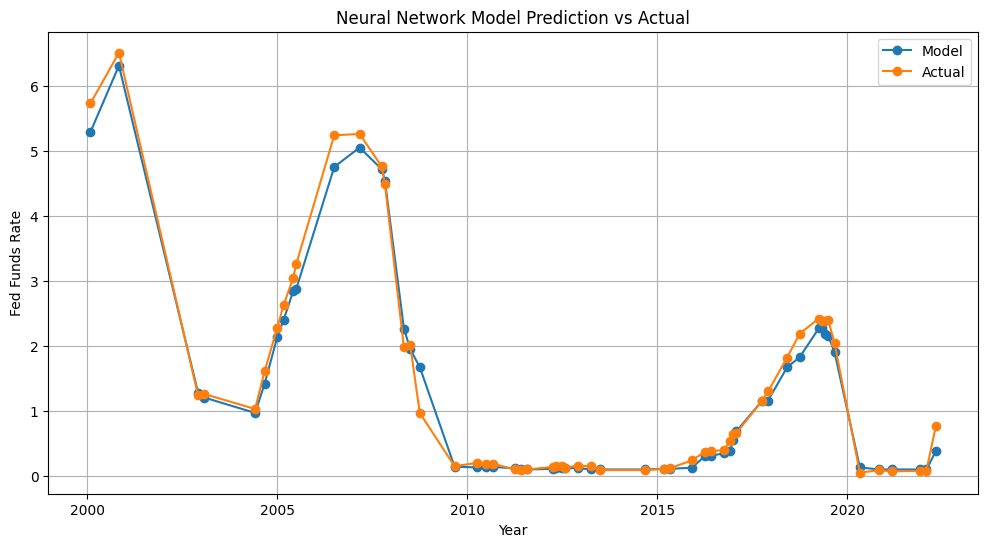

TypeError: array() missing required argument 'object' (pos 0)

In [59]:
def graphModel(model, year_i, month_i, year_f, month_f, model_type, sample_proportion):
    START_INDEX = getIndexFromYearMonth(year_i, month_i)
    END_INDEX = getIndexFromYearMonth(year_f, month_f)

    CPI_Sample = np.array(ADJ_CPI_monthly[START_INDEX-1:END_INDEX])
    Unem_Sample = np.array(adj_unem_data[START_INDEX-1:END_INDEX])
    Fed_Sample = np.array(fed_data[START_INDEX-1:END_INDEX])
    Years_Sample = np.array(years_passed[START_INDEX:END_INDEX+1])
    Output_Sample = np.array(fed_data[START_INDEX:END_INDEX+1])

    total_samples = END_INDEX - START_INDEX + 1
    indices = np.random.permutation(total_samples)

    train_samples = int(total_samples * (1-sample_proportion))
    val_samples = total_samples - train_samples

    x1_val, x2_val, x3_val, Y_Val = CPI_Sample[indices[train_samples:train_samples+val_samples]], \
                            Unem_Sample[indices[train_samples:train_samples+val_samples]], \
                            Fed_Sample[indices[train_samples:train_samples+val_samples]],\
                            Output_Sample[indices[train_samples:train_samples+val_samples]]
    year_val = Years_Sample[indices[train_samples:train_samples+val_samples]]

    X_Val = np.column_stack((np.ones_like(x1_val), x1_val, x2_val, x3_val))
    Y_Pred = np.array()
    if model is not None:
        Y_Pred = np.maximum(model.predict(X_Val), 0.1)
    mse = mean_squared_error(Y_Val, Y_Pred)
    print("Mean Squared Error (MSE):", mse)

    sorted_indices = np.argsort(year_val)
    
    plt.figure(figsize=(12, 6))
    plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices], linewidth=1.5, label='Model', marker='o')
    plt.plot(year_val[sorted_indices], Y_Val[sorted_indices], linewidth=1.5, label='Actual', marker='o') 


    plt.title(f'{model_type} Model Backtest vs Actual')
    plt.xlabel(f'Year')
    plt.ylabel('Fed Funds Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

model = getNeuralNetworkModel(2000, 'Jan', 2022, 'Dec', False)
graphModel(model, 2023, 'Jan', 2024, 'Feb', 'Neural', 1)